# Exercise 4.10 Coding Etiquette & Excel Reporting_Part 1 / 1

1. Import libraries
2. Handling PII/Data Privacy
3. Regional segmentation of the data
4. Excluding low-activity customers
5. Customer profiling

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#Import Dataset
path=r'C:\Users\north\08-2024 Instacart Basket Analysis'
cust_ordsmerge=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_orders.merged.pkl'))


**02. Handling PII/Data Privacy**

In [6]:
cust_ordsmerge.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'num_dependents',
       'family_status', 'income', 'order_id', 'order_number', 'order_weekday',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merge_flag', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'user_spending',
       'spending_flag', 'order_frequency', 'frequency_flag'],
      dtype='object')

**Note**: In Exercise 4.9 I already deleted the columns 'first_name' and 'family_name'. As these two are already deleted i don´t see the need to delete other columns in this dataframe.

**03. Regional segmentation of the data**

In [9]:
# Create a mapping of states to regions
region_mapping = {
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',
    'New Jersey': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Michigan': 'Midwest',
    'Ohio': 'Midwest', 'Wisconsin': 'Midwest', 'Iowa': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Missouri': 'Midwest', 'Nebraska': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest',
    'Delaware': 'South', 'Florida': 'South', 'Georgia': 'South', 'Maryland': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Virginia': 'South',
    'Washington, D.C.': 'South', 'West Virginia': 'South', 'Alabama': 'South',
    'Kentucky': 'South', 'Mississippi': 'South', 'Tennessee': 'South', 'Arkansas': 'South',
    'Louisiana': 'South', 'Oklahoma': 'South', 'Texas': 'South', 'District of Columbia': 'South',
    'Arizona': 'West', 'Colorado': 'West', 'Idaho': 'West', 'Montana': 'West',
    'Nevada': 'West', 'New Mexico': 'West', 'Utah': 'West', 'Wyoming': 'West',
    'Alaska': 'West', 'California': 'West', 'Hawaii': 'West', 'Oregon': 'West',
    'Washington': 'West'
}

In [10]:
# Create the "region" column
cust_ordsmerge['region'] = cust_ordsmerge['state'].map(region_mapping)

In [11]:
# Checking the dataframe
cust_ordsmerge.head(5)

,user_id,gender,state,age,date_joined,num_dependents,family_status,income,order_id,order_number,...,merge_flag,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_spending,spending_flag,order_frequency,frequency_flag,region
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,both,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,both,Regular days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,both,Slowest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,both,Slowest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,both,Slowest days,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest


In [12]:
# Analyze spending habits by region
# Crosstab for spending habits by region
spending_by_region = pd.crosstab(cust_ordsmerge['region'], cust_ordsmerge['spending_flag'], dropna=False)

In [13]:
# Display the result
print(spending_by_region)

spending_flag  High Spender  Low Spender
region                                  
Midwest               29265      7568060
Northeast             18642      5704094
South                 40579     10751306
West                  31242      8261671


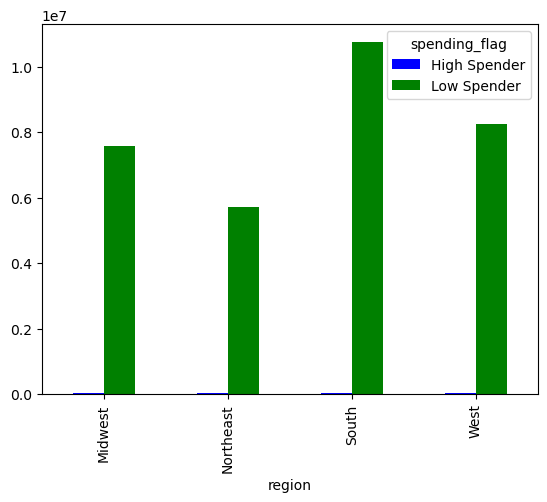

In [14]:
#Bar graph of the crosstab
bar_regional_spending_habits = spending_by_region.plot.bar(color=['blue','green'])

**Answer:** The bar chart compares the number of High Spender and Low Spender customers across four regions: Midwest, Northeast, South, and West. Customer base primarily consist of Low spenders. Regional Differences: The South region has the highest customer engagement in terms of spending, while the Northeast has the lowest. Customer base primarily consist of Low spenders

In [16]:
bar_regional_spending_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_based_spending.png'))

**04. Excluding low-activity customers**

In [18]:
#Create an exclusion flag for customers with fewer than 5 orders
cust_ordsmerge['exclusion_flag'] = np.where(cust_ordsmerge['max_order'] < 5, 'Exclude', 'Include')

In [19]:
#Filter the data to exclude low-activity customers
filtered_custordsmerge = cust_ordsmerge[cust_ordsmerge['exclusion_flag'] == 'Include'].copy()

In [20]:
# Display the result
print(filtered_custordsmerge[['max_order', 'exclusion_flag']].head())

   max_order exclusion_flag
0          8        Include
1          8        Include
2          8        Include
3          8        Include
4          8        Include


In [21]:
#Export the filtered data to a pkl file
filtered_custordsmerge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'filtered_lowactive_customer.pkl'))

**05. Customer profiling based on age, income, certain goods in the “department_id” column, and number of dependents**

Define Customer Profiles

**Single Adult**
Age: 18-24;
Income: Moderate to High;
Dependents: 0;
Shopping Preferences: Prefers "Alcohol," "Snacks," "Frozen," etc.;
Shopping Time: Late evening, weekends.


**Young Parent**
Age: 25-40;
Income: Moderate;
Dependents: 1-3;
Shopping Preferences: Prefers "Babies," "Dairy," "Cereal," etc.;
Shopping Time: Morning, weekends.

**Senior:**
Age: 60+;
Income: Moderate to Low;
Dependents: 0 or 1;
Shopping Preferences: Prefers "Health," "Produce," "Bakery," etc.;
Shopping Time: Weekdays, early morning.

In [24]:
# Optimized customer profiling function
def assign_customer_profile(row):
    if (18 <= row['age'] <= 24) and (row['income'] >= 40000) and (row['num_dependents'] == 0):
        if row['department_id'] in [5, 19, 11]:
            return 'Single Adult'
    elif (25 <= row['age'] <= 40) and (row['income'] >= 40000 and row['income'] <= 75000) and (1 <= row['num_dependents'] <= 3):
        if row['department_id'] in [18, 16, 8]:
            return 'Young Parent'
    elif (row['age'] >= 60) and (row['income'] <= 40000):
        if row['department_id'] in [7, 4, 3]:
            return 'Senior'
    return 'Other'

In [25]:
# Apply the profiling function
cust_ordsmerge['customer_profile'] = cust_ordsmerge.apply(assign_customer_profile, axis=1)

In [26]:
cust_ordsmerge.head()

,user_id,gender,state,age,date_joined,num_dependents,family_status,income,order_id,order_number,...,busiest_period_of_day,max_order,loyalty_flag,user_spending,spending_flag,order_frequency,frequency_flag,region,exclusion_flag,customer_profile
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,Average orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other


In [27]:
#Create Categories age variable
result = []
for age in cust_ordsmerge['age']: 
    if age >= 18 and age <= 24:
        result.append('Single Adult')
    elif age >= 25 and age <= 40:
        result.append('Young Parent')
    elif age >= 60:
        result.append('Senior')
    else:
        result.append('other')

# Adding age_group column and assigning the results
cust_ordsmerge['age_group'] = result 
cust_ordsmerge['age_group'].value_counts()

age_group
Senior          11067255
other            9667558
Young Parent     8097045
Single Adult     3573001
Name: count, dtype: int64

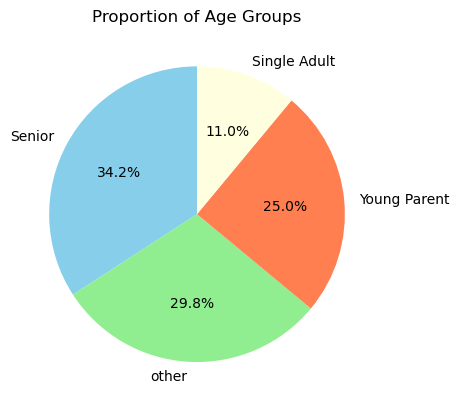

In [28]:
# Calculate the count of each age group
age_group_counts = cust_ordsmerge['age_group'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()
age_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, colors=['skyblue', 'lightgreen', 'coral', 'lightyellow'])

# Set chart properties
ax.set_ylabel('')  # Remove the default y-label
ax.set_title('Proportion of Age Groups')

# Save the figure to a file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_proportion_of_age_groups.png'))

# Show the plot if running interactively
plt.show()

In [29]:
# Create income Categories
result = []
for income in cust_ordsmerge['income']: 
    if income <= 49999:
        result.append('low income')
    elif income>=50000 and income<=99999:
        result.append('moderate income')
    elif income>=100000:
        result.append('high income')

#adding income_group column and assigning the results
cust_ordsmerge['income_group'] = result 
cust_ordsmerge['income_group'].value_counts()

income_group
high income        14814766
moderate income    13996010
low income          3594083
Name: count, dtype: int64

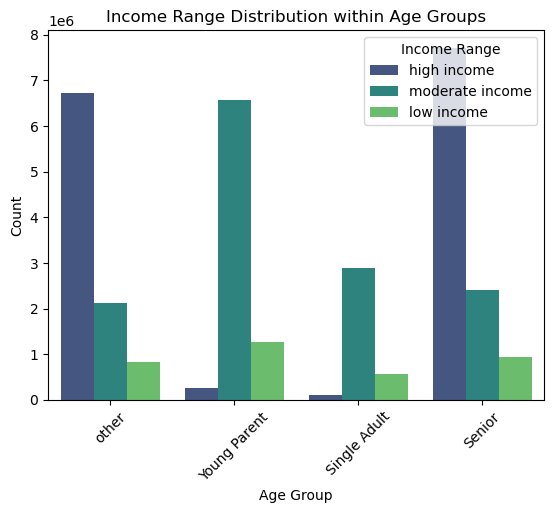

In [30]:
# Create a grouped bar chart
sns.countplot(data=cust_ordsmerge, x='age_group', hue='income_group', palette='viridis')

# Set chart labels and title
plt.title('Income Range Distribution within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Income Range')
plt.xticks(rotation=45)

# Save the figure to a file
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'grouped_bar_age_income_distribution.png')
plt.savefig(output_path, bbox_inches='tight')  # Save the plot

# Show the plot
plt.show()

In [31]:
# Create dependents categories
result = []

for dependents in cust_ordsmerge['num_dependents']: 
    if dependents <= 1:
        result.append('small')
    elif dependents == 2:
        result.append('medium')
    elif dependents >= 3:
        result.append('large')
    else:
        result.append('No data')

cust_ordsmerge['dependents_category'] = result
cust_ordsmerge['dependents_category'].value_counts()

dependents_category
small     16178607
large      8135109
medium     8091143
Name: count, dtype: int64

C:\Users\north\AppData\Local\Temp\ipykernel_9236\4170565186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=cust_ordsmerge, y='dependents_category', palette='viridis')


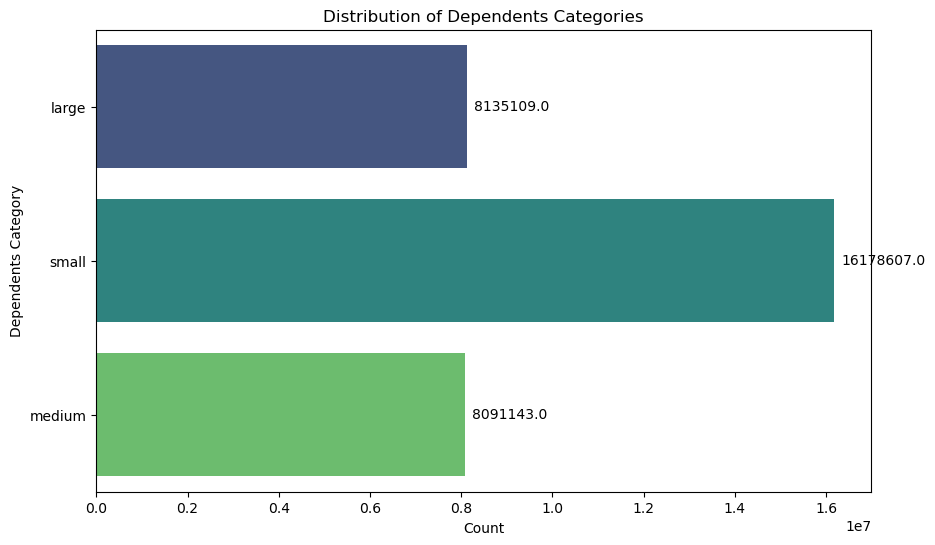

In [32]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cust_ordsmerge, y='dependents_category', palette='viridis')

# Add annotations on the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}', 
                xy=(width, p.get_y() + p.get_height() / 2), 
                xytext=(5, 0), 
                textcoords="offset points", 
                ha='left', va='center')

plt.title('Distribution of Dependents Categories')
plt.xlabel('Count')
plt.ylabel('Dependents Category')

# Save the figure to a file
output_path = os.path.join(path, '04 Analysis', 'Visualizations', 'horizontal_bar_dependents_distribution.png')
plt.savefig(output_path, bbox_inches='tight')

plt.show()


**Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure**

In [34]:
# Aggregating max, mean, and min for 'order_frequency' and 'user_spending'
aggregated_df = cust_ordsmerge.groupby('age_group').agg({
    'order_frequency': ['max', 'mean', 'min'],
    'user_spending': ['max', 'mean', 'min']
}).reset_index()


In [35]:
aggregated_df

age_group order_frequency                 user_spending               
                            max       mean  min           max      mean  min
0        Senior            30.0  10.387257  0.0     23.200000  7.795309  1.0
1  Single Adult            30.0  10.357888  0.0     16.700000  7.790869  1.1
2  Young Parent            30.0  10.412491  0.0     18.233333  7.784655  1.0
3         other            30.0  10.412178  0.0     20.114286  7.791416  1.0

**Compare your customer profiles with regions and departments**

In [37]:
cust_ordsmerge.head()

,user_id,gender,state,age,date_joined,num_dependents,family_status,income,order_id,order_number,...,user_spending,spending_flag,order_frequency,frequency_flag,region,exclusion_flag,customer_profile,age_group,income_group,dependents_category
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,518967,1,...,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other,other,high income,large
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,423547,2,...,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other,other,high income,large
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other,other,high income,large
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other,other,high income,large
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,2524893,3,...,7.988889,Low Spender,19.0,Regular customer,Midwest,Include,Other,other,high income,large


In [38]:
# Crosstab for age_group profile and regions
profile_region = pd.crosstab(cust_ordsmerge['age_group'], cust_ordsmerge['region'])

# Crosstab for age_group profile and department
profile_department = pd.crosstab(cust_ordsmerge['age_group'], cust_ordsmerge['department_id'])


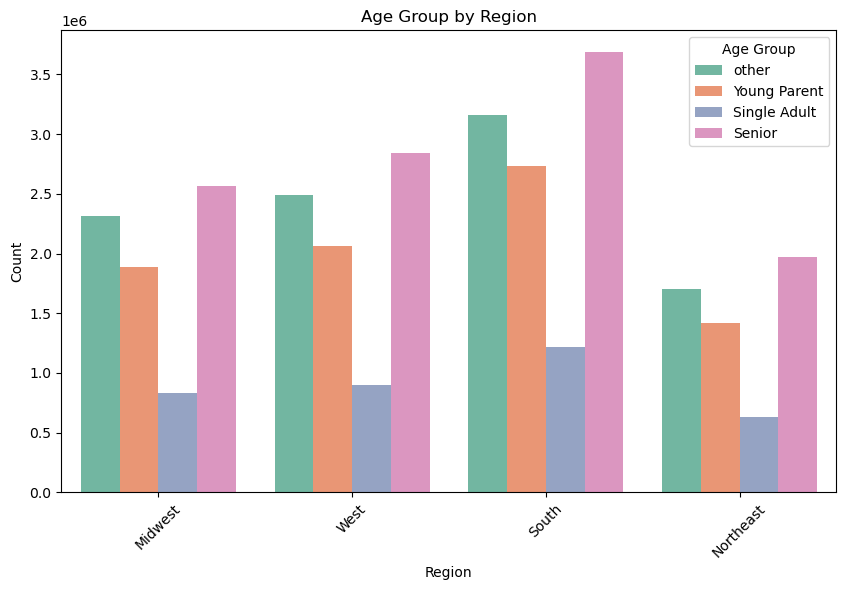

In [39]:
# Create a bar chart for age groups by region comparison
plt.figure(figsize=(10, 6))
sns.countplot(data=cust_ordsmerge, x='region', hue='age_group', palette='Set2')

# Set chart labels and title
plt.title('Age Group by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profiles_by_region.png'), bbox_inches='tight')

# Show the plot
plt.show()


In [40]:
cust_ordsmerge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'custords_merge_final.pkl'))